In [1]:
%load_ext autoreload
%autoreload 2

import graphviz
import tempfile

try: 
    from docs.helpers import plot_cwl, wrap_cwl
except ModuleNotFoundError:

    import os
    import sys
    module_path = os.path.abspath(os.path.join('.')) # or the path to your source code
    sys.path.insert(0, module_path)
    from .helpers import plot_cwl, wrap_cwl

/home/fbrito/.local/share/hatch/env/virtual/patterns/VcrZkRRN/patterns/lib/python3.13/site-packages/cwl_wrapper/parser.py:3: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


# Hello!

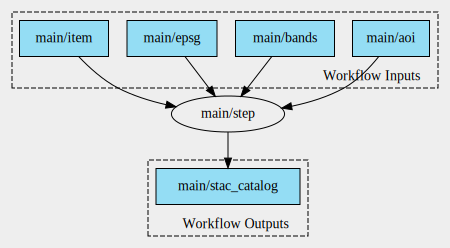

In [2]:
app_cwl_file = '../cwl-workflow/pattern-1.cwl'
graphviz.Source(plot_cwl(app_cwl_file, "main"))

True


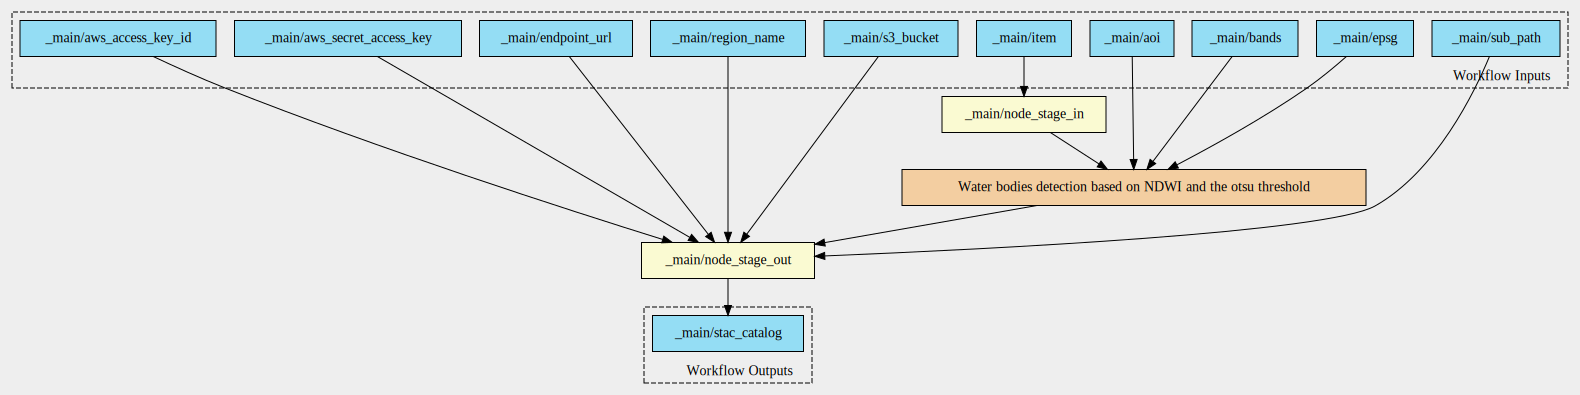

In [3]:
with tempfile.NamedTemporaryFile(suffix=".cwl", mode="w", delete=True) as tmp:
    tmp.write(wrap_cwl(app_cwl_file, "main"))
    tmp.flush()

    viz = plot_cwl(tmp.name, entrypoint="_main")
graphviz.Source(viz)